![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**1- Make sure that your Python version is 3.3 or higher**

In [1]:
from platform import python_version
print (python_version())

**2- Install SASPy**

In [2]:
pip install saspy


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**3- Make sure that the configuration file "sascfg_personal.py" is correctly created**

In [3]:
import saspy, os
print(saspy.__file__.replace('__init__.py', 'sascfg_personal.py'))

C:\Users\leGalane\anaconda3\lib\site-packages\saspy\sascfg_personal.py


**4- Establish Connection (Need to do this step each time you use SASPy)**

In [55]:
import saspy
sas_session = saspy.SASsession()
sas_session

Using SAS Config named: oda
Error trying to read authinfo file:C:\Users\leGalane\_authinfo
[Errno 2] No such file or directory: 'C:\\Users\\leGalane\\_authinfo'
Did not find key oda in authinfo file:C:\Users\leGalane\_authinfo

Please enter the OMR user id: a01651812@tec.mx
Please enter the password for OMR user : ········
SAS Connection established. Subprocess id is 109452



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = C:\Users\leGalane\anaconda3\lib\site-packages\saspy\sascfg_personal.py
WORK Path             = /saswork/SAS_work339E0001E211_odaws01-usw2-2.oda.sas.com/SAS_workEBEC0001E211_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 123409


***
## Connect to Cortex Data Sets

In [57]:
%%SAS sas_session

libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [58]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [59]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
#data_merge.head()
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
775920,2775921.0,BOTELLO,KYLE,0.0,46.0,40700.0,University / College,Suburban,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
990582,2990583.0,SIMPSON,GREGORY,0.0,37.0,9900.0,University / College,Downtown,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Treating Missing Values

Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [60]:
# In this case, we are replacing MinGift with 0.
# You can do the same for what you think is reasonable for dealing with the other variables.
#We do the same processing that we did in the Amount

data_merge[['TotalGift','MinGift']] = data_merge[['TotalGift','MinGift']].fillna(value=0)  

data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
817550,2817551.0,LAWSON,JAMIE,1.0,38.0,177300.0,University / College,Rural,3.0,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
724535,2724536.0,SHEPHERD,IRENE,1.0,23.0,4800.0,University / College,City,5.0,0.0,...,1.0,2.0,750.0,750.0,750.0,1.0,20.0,0.0,0.0,0.0
455031,2455032.0,LEONARD,AMY,1.0,80.0,29000.0,University / College,City,4.0,0.0,...,1.0,2.0,200.0,200.0,200.0,0.0,0.0,0.0,0.0,0.0


## Data Partition

In [61]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
394369,2394370.0,HAMMOND,LINDSAY,1.0,28.0,172200.0,University / College,City,8.0,1.0,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
362829,2362830.0,MCGEE,ALESIA,1.0,64.0,23600.0,University / College,Suburban,1.0,1.0,...,1.0,1.0,40.0,40.0,40.0,0.0,0.0,0.0,1.0,125.0


# Prebuilt Models

The sk-learn library offers more advanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  

## Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression

#comment: it's numpy array ==> categorical variables
X_train = train[['Age', 'Salary','TotalGift','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age', 'Salary','TotalGift','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

regr = LogisticRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [76]:
#you can change the criteria

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, regr_predict)
print(confusion_matrix)

[[340029    184]
 [ 59668    119]]


In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, regr_predict))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    340213
         1.0       0.39      0.00      0.00     59787

    accuracy                           0.85    400000
   macro avg       0.62      0.50      0.46    400000
weighted avg       0.78      0.85      0.78    400000



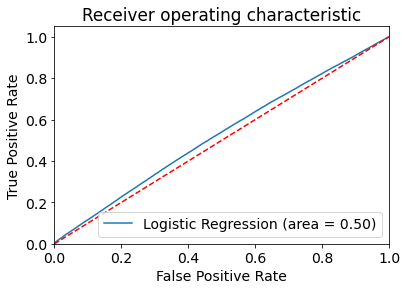

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(Y_valid, regr.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, regr.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

As we can see, the model doesn't learn well, so we need to try with other models.

## Decision Tree Model

In [79]:
from sklearn.tree import DecisionTreeClassifier

X_train = train[['Age','Salary','TotalGift','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age','Salary','TotalGift','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

DT_model = DecisionTreeClassifier(max_depth=5,criterion="entropy").fit(X_train,Y_train)
DT_predict_proba = DT_model.predict_proba(X_valid) #Predictions on Testing data
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.11072745 0.1603026  0.38710196 ... 0.07729761 0.63065804 0.10409085]


In [80]:
#you can change the criteria
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)


[[335483   4730]
 [ 52760   7027]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    340213
         1.0       0.60      0.12      0.20     59787

    accuracy                           0.86    400000
   macro avg       0.73      0.55      0.56    400000
weighted avg       0.82      0.86      0.81    400000



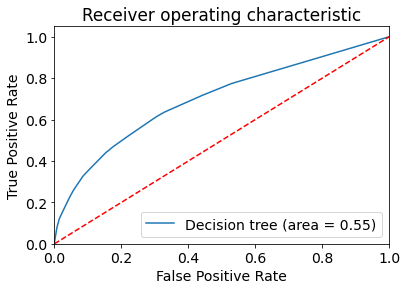

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

This model learns better the data, so we can use this one for the final model. We are going to try another model to compare.

### *Other models may also be helpful for this game*

Reference: https://scikit-learn.org/stable/supervised_learning.html
    

In [70]:
from sklearn.linear_model import SGDClassifier

In [83]:
X_train = train[['Age','Salary','TotalGift','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age','Salary','TotalGift','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

SGD = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=20).fit(X_train,Y_train)
SGD_predict = SGD.predict(X_valid) #Predictions on Testing data
print(SGD_predict)

[0. 0. 0. ... 0. 0. 0.]


C:\Users\leGalane\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [84]:
print(classification_report(Y_valid, SGD_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92    340213
         1.0       0.30      0.03      0.05     59787

    accuracy                           0.85    400000
   macro avg       0.58      0.51      0.48    400000
weighted avg       0.77      0.85      0.79    400000



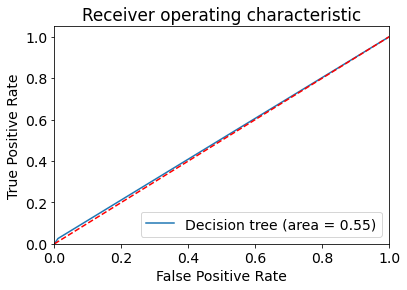

In [85]:
plt.rc("font", size=14)

SGD_roc_auc = roc_auc_score(Y_valid, SGD.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, SGD.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SGD_ROC')
plt.show()

As we can se in te ROC graph, this is the worst model to predict the probability of contaccting a person, so we are going to use the Decision Tree Model. 

## Scoring New Data

### Prepare data for scoring

In [86]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [88]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['TotalGift','MinGift']] = scoring_data_contact[['TotalGift','MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_contact[['Age','Salary','TotalGift','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
DT_predict_contact=DT_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.289052
1,2000002.0,0.630658
2,2000003.0,0.630658
3,2000004.0,0.378129
4,2000005.0,0.527542


In [89]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data_contact[['TotalGift','MinGift']] = scoring_data_contact[['TotalGift','MinGift']].fillna(value=0)
X = scoring_data_contact[['Age','Salary','TotalGift','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 

### Predict 'probability of giving' for members who were not contacted

In [90]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['TotalGift','MinGift']] = scoring_data_nocontact[['TotalGift','MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_nocontact[['Age','Salary','TotalGift','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
DT_predict_nocontact=DT_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.110727
1,2000002.0,0.104091
2,2000003.0,0.077298
3,2000004.0,0.077298
4,2000005.0,0.077298


In [91]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,ProbNoContact
143983,2143984.0,COOK,VALARIE,1.0,54.0,35200.0,High School,City,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.077298
326396,2326397.0,MCGEE,LAURIE,1.0,49.0,56500.0,University / College,City,10.0,3.0,...,0.0,3.0,10.0,90.0,20.0,50.0,1.0,20.0,1.0,0.302586
929060,2929061.0,ROTH,BRIAN,0.0,64.0,127200.0,University / College,Downtown,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.077298
61181,2061182.0,MEYER,FRANK,0.0,57.0,47800.0,High School,City,2.0,1.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.104091
865125,2865126.0,LI,TAMEKA,1.0,19.0,33800.0,University / College,City,3.0,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.077298
260977,2260978.0,BRYAN,ROBERT,0.0,20.0,23700.0,University / College,City,6.0,0.0,...,0.0,1.0,0.0,20.0,20.0,20.0,0.0,0.0,1.0,0.110727
8762,2008763.0,PARRISH,TINA,1.0,31.0,33400.0,Elementary,Suburban,1.0,1.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.104091
420012,2420013.0,MEYERS,EUGENE,0.0,21.0,15400.0,University / College,Rural,6.0,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.077298
405982,2405983.0,RANNELS,JAMES,0.0,21.0,20400.0,University / College,Suburban,4.0,1.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.104091
170489,2170490.0,BRITT,RICHARD,0.0,50.0,64500.0,University / College,City,9.0,1.0,...,1.0,2.0,9.0,30.0,10.0,20.0,1.0,20.0,1.0,0.255361


## Exporting Results to a CSV File

In [92]:
result_Prob.to_csv('Round2_Output_prob.csv', index=False)

In [93]:
import pandas as pd

NB = 100000

probabilities = pd.read_csv("Round2_Output_prob.csv")
amounts = pd.read_csv("Round2_Output_amt.csv")
raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")


In [94]:
raw_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ID             1000000 non-null  float64
 1   LastName       999977 non-null   object 
 2   FirstName      999996 non-null   object 
 3   Woman          1000000 non-null  float64
 4   Age            1000000 non-null  float64
 5   Salary         1000000 non-null  float64
 6   Education      1000000 non-null  object 
 7   City           1000000 non-null  object 
 8   SeniorList     1000000 non-null  float64
 9   NbActivities   1000000 non-null  float64
 10  Referrals      1000000 non-null  float64
 11  Recency        397513 non-null   float64
 12  Frequency      397513 non-null   float64
 13  Seniority      397513 non-null   float64
 14  TotalGift      1000000 non-null  float64
 15  MinGift        1000000 non-null  float64
 16  MaxGift        397513 non-null   float64
 17  GaveLastY

In [99]:
def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact'] * raw_data['Contact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [115]:
# Export the final csv file

submission = raw_submission.head(NB)
sumbission = submission[submission["Uplift"] > 100]
submission.to_csv('Round2 Output final.csv', index=False)

In [ ]:
# Congratulations! You are now done with Round 2. You are ready to prepare your solution to upload it to the leaderboard.

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.